<a href="https://colab.research.google.com/github/Adi-Raj007/1st-project-../blob/main/Segmentation%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentation Analysis On Data**

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic customer data
np.random.seed(42)

n_customers = 1000
ages = np.random.randint(18, 65, size=n_customers)
genders = np.random.choice(['Male', 'Female'], size=n_customers)
total_spend = np.random.uniform(50, 500, size=n_customers)
last_purchase_dates = pd.date_range(start='2023-01-01', end='2023-06-01', periods=n_customers)
product_category_preferences = np.random.choice(['Clothing', 'Shoes', 'Accessories'], size=n_customers)
website_visits = np.random.randint(1, 30, size=n_customers)

# Create the DataFrame
data = pd.DataFrame({
    'Customer ID': range(1, n_customers + 1),
    'Age': ages,
    'Gender': genders,
    'Total Spend': total_spend,
    'Last Purchase Date': last_purchase_dates,
    'Product Category Preferences': product_category_preferences,
    'Website Visits': website_visits
})

# Save the dataset to a CSV file
data.to_csv('Data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


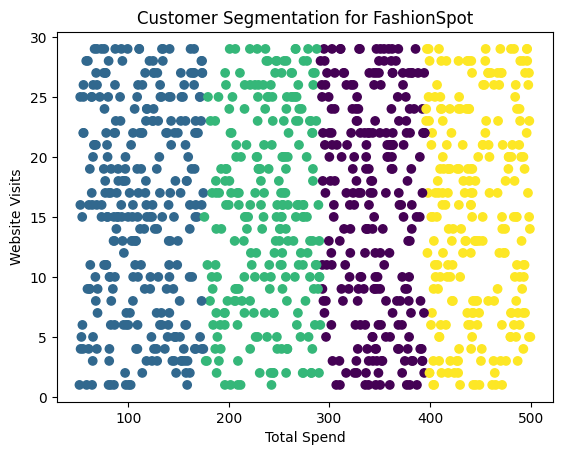

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = pd.read_csv('Data.csv')

data = data.dropna()


data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
features = ['Age', 'Total Spend', 'Website Visits']

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data[features])


data['Segment'] = kmeans.labels_


segment_metrics = data.groupby('Segment')[['Total Spend', 'Website Visits']].mean()


plt.scatter(data['Total Spend'], data['Website Visits'], c=data['Segment'])
plt.xlabel('Total Spend')
plt.ylabel('Website Visits')
plt.title('Customer Segmentation for FashionSpot')
plt.show()
